In [1]:
%pylab inline
import pandas as pd
import numpy as np
import itertools

Populating the interactive namespace from numpy and matplotlib


In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Name"])

In [3]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


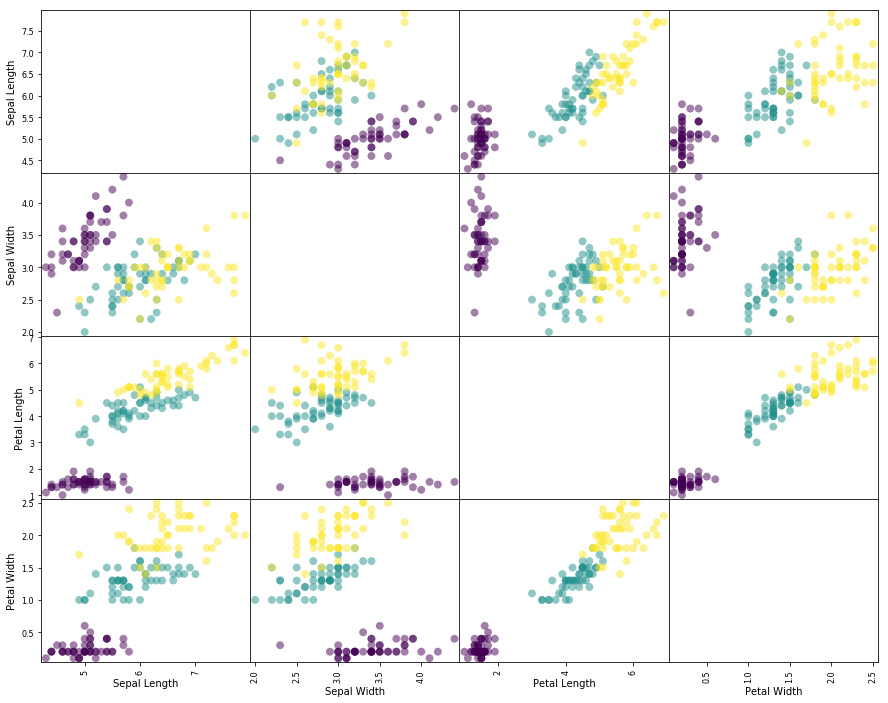

In [4]:
colors = pd.factorize(df["Name"])[0]
pd.plotting.scatter_matrix(df, figsize=(15, 12), diagonal=None, c=colors, s=250);

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
features = df.iloc[:, :-1]
pairs = list(itertools.combinations(features.columns, 2))

In [71]:
def plot1(regr, X_test, y_test, a, b):
    y_pred = regr.predict(X_test)
    plt.scatter(X_test, y_test,  color='black')
    plt.plot(X_test, y_pred, color='blue', linewidth=3)
    plt.xlabel(a)
    plt.ylabel(b)
    plt.show()

In [8]:
def print_result(regr, X_test, y_test):
    print("Coefficient(s): ", regr.coef_)
    print("Residual sum of squares: %.2f" % np.mean(((regr.predict(X_test) - y_test) ** 2)))
    print("Variance score: %.2f" % regr.score(X_test, y_test))
    print("\n")

Pairwise Combination:  Sepal Length - Sepal Width


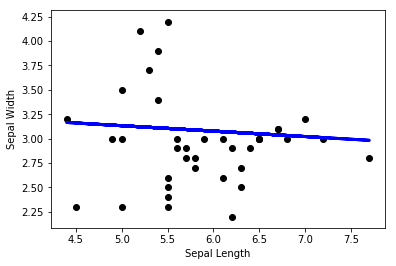

Coefficient(s):  [[-0.05553813]]
Residual sum of squares: 0.22
Variance score: -0.06


Pairwise Combination:  Sepal Length - Petal Length


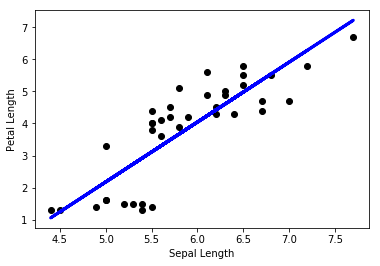

Coefficient(s):  [[1.87056497]]
Residual sum of squares: 0.73
Variance score: 0.70


Pairwise Combination:  Sepal Length - Petal Width


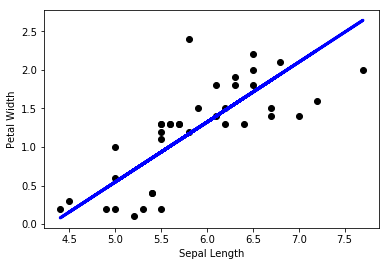

Coefficient(s):  [[0.77608741]]
Residual sum of squares: 0.18
Variance score: 0.56


Pairwise Combination:  Sepal Width - Petal Length


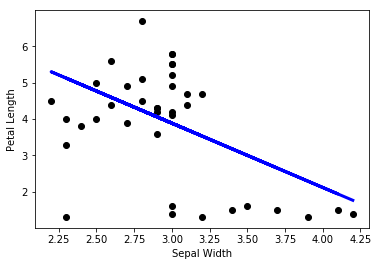

Coefficient(s):  [[-1.76491664]]
Residual sum of squares: 1.91
Variance score: 0.22


Pairwise Combination:  Sepal Width - Petal Width


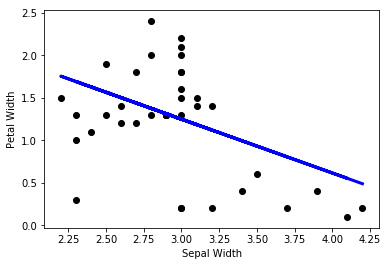

Coefficient(s):  [[-0.63359169]]
Residual sum of squares: 0.32
Variance score: 0.20


Pairwise Combination:  Petal Length - Petal Width


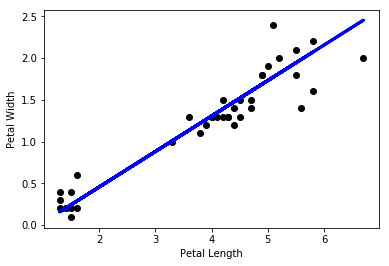

Coefficient(s):  [[0.4246881]]
Residual sum of squares: 0.05
Variance score: 0.88




In [72]:
for a, b in pairs:
    feature_a = features[[a]]
    feature_b = features[[b]]
    X_train, X_test, y_train, y_test = train_test_split(feature_a, feature_b, random_state=101)
    regr = LinearRegression()
    regr.fit(X_train, y_train)
    print("Pairwise Combination: ", a + " - " + b)
    plot1(regr, X_test, y_test, a, b)
    print_result(regr, X_test, y_test)

In [104]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

In [124]:
def plot2(regr, X_test, y_test, a, b, c):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    y_pred = regr.predict(X_test)
    ax.scatter(X_test[b], X_test[c], y_test, color='black')
    x, y = np.meshgrid(X_test[b], X_test[c])
    ax.plot_wireframe(X=x, Y=y, Z=y_pred)
    
    #xd = np.array(X_test[b])
    #yd = np.array(X_test[c])
    #y_pred = np.reshape(y_pred, xd.shape)
    #xi = np.linspace(xd.min(), xd.max(), 50)
    #yi = np.linspace(yd.min(), yd.max(), 50)
    #zi = griddata((xd, yd), y_pred, (xi[None, :], yi[:, None]), method='nearest')
    #x, y = np.meshgrid(xi, yi)
    #ax.plot_wireframe(X=x, Y=y, Z=zi)
    
    ax.set_xlabel(b)
    ax.set_ylabel(c)
    ax.set_zlabel(a)
    plt.show()

In [141]:
permutations = list(itertools.permutations(features.columns, 3))
combinations = []
for i in range(0, 4):
    combinations.append(permutations[0 + 6 * i])
    combinations.append(permutations[1 + 6 * i])
    combinations.append(permutations[3 + 6 * i])
combinations

[('Sepal Length', 'Sepal Width', 'Petal Length'),
 ('Sepal Length', 'Sepal Width', 'Petal Width'),
 ('Sepal Length', 'Petal Length', 'Petal Width'),
 ('Sepal Width', 'Sepal Length', 'Petal Length'),
 ('Sepal Width', 'Sepal Length', 'Petal Width'),
 ('Sepal Width', 'Petal Length', 'Petal Width'),
 ('Petal Length', 'Sepal Length', 'Sepal Width'),
 ('Petal Length', 'Sepal Length', 'Petal Width'),
 ('Petal Length', 'Sepal Width', 'Petal Width'),
 ('Petal Width', 'Sepal Length', 'Sepal Width'),
 ('Petal Width', 'Sepal Length', 'Petal Length'),
 ('Petal Width', 'Sepal Width', 'Petal Length')]

Pairwise Combination:  Sepal Width and Petal Length - Sepal Length


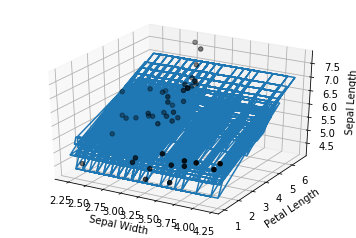

Coefficient(s):  [[0.58815538 0.46008841]]
Residual sum of squares: 0.11
Variance score: 0.82


Pairwise Combination:  Sepal Width and Petal Width - Sepal Length


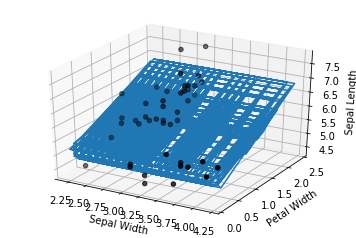

Coefficient(s):  [[0.37824841 0.9301982 ]]
Residual sum of squares: 0.19
Variance score: 0.69


Pairwise Combination:  Petal Length and Petal Width - Sepal Length


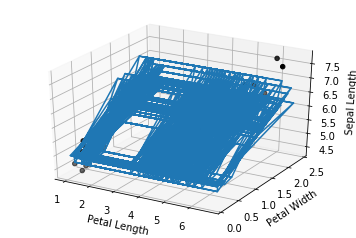

Coefficient(s):  [[ 0.56592246 -0.37190233]]
Residual sum of squares: 0.17
Variance score: 0.73


Pairwise Combination:  Sepal Length and Petal Length - Sepal Width


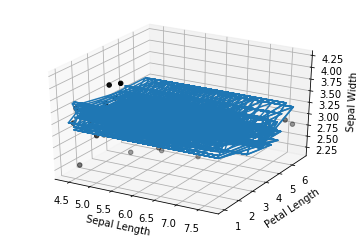

Coefficient(s):  [[ 0.55281708 -0.31472729]]
Residual sum of squares: 0.11
Variance score: 0.47


Pairwise Combination:  Sepal Length and Petal Width - Sepal Width


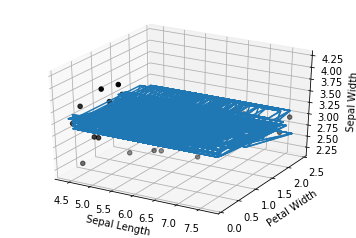

Coefficient(s):  [[ 0.26947234 -0.39854988]]
Residual sum of squares: 0.15
Variance score: 0.25


Pairwise Combination:  Petal Length and Petal Width - Sepal Width


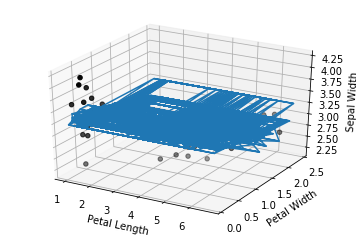

Coefficient(s):  [[-0.29014906  0.47098205]]
Residual sum of squares: 0.16
Variance score: 0.18


Pairwise Combination:  Sepal Length and Sepal Width - Petal Length


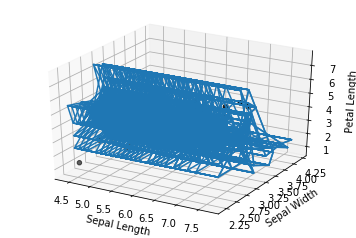

Coefficient(s):  [[ 1.83601176 -1.33622377]]
Residual sum of squares: 0.37
Variance score: 0.86


Pairwise Combination:  Sepal Length and Petal Width - Petal Length


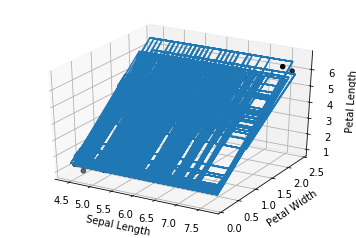

Coefficient(s):  [[0.54855601 1.71468567]]
Residual sum of squares: 0.18
Variance score: 0.93


Pairwise Combination:  Sepal Width and Petal Width - Petal Length


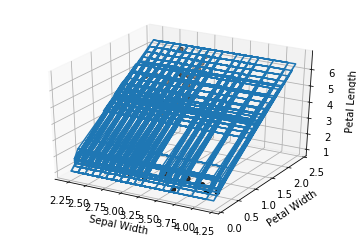

Coefficient(s):  [[-0.39477363  2.1257756 ]]
Residual sum of squares: 0.23
Variance score: 0.91


Pairwise Combination:  Sepal Length and Sepal Width - Petal Width


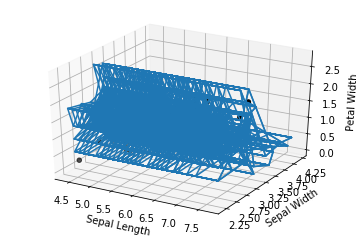

Coefficient(s):  [[ 0.76463617 -0.45985927]]
Residual sum of squares: 0.11
Variance score: 0.74


Pairwise Combination:  Sepal Length and Petal Length - Petal Width


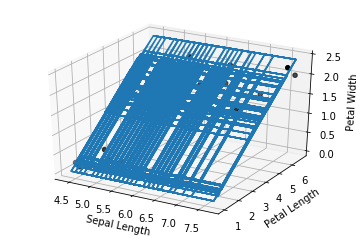

Coefficient(s):  [[-0.0979694   0.46599579]]
Residual sum of squares: 0.04
Variance score: 0.90


Pairwise Combination:  Sepal Width and Petal Length - Petal Width


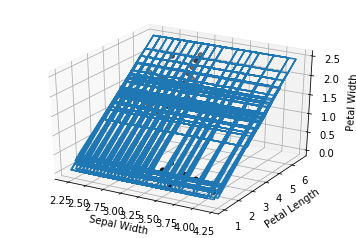

Coefficient(s):  [[0.13200078 0.43788755]]
Residual sum of squares: 0.04
Variance score: 0.90




In [143]:
for a, b, c in combinations:
    feature_X = features[[b, c]]
    feature_y = features[[a]]
    X_train, X_test, y_train, y_test = train_test_split(feature_X, feature_y, test_size=0.3, random_state=101)
    regr = LinearRegression()
    regr.fit(X_train, y_train)
    print("Pairwise Combination: ", b + " and " + c + " - " + a)
    plot2(regr, X_test, y_test, a, b, c)
    print_result(regr, X_test, y_test)

In [138]:
def plot3(regr, X_test, y_test, a, b, c, d):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors = X_test[d]
    ax.scatter3D(X_test[b], X_test[c], y_test, c=colors, cmap=plt.hot())
    ax.set_xlabel(b)
    ax.set_ylabel(c)
    ax.set_zlabel(a)
    plt.show()

In [146]:
permutations2 = list(itertools.permutations(features.columns, 4))
combinations2 = []
for i in range(0, 4):
    combinations2.append(permutations2[6 * i])
combinations2

[('Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'),
 ('Sepal Width', 'Sepal Length', 'Petal Length', 'Petal Width'),
 ('Petal Length', 'Sepal Length', 'Sepal Width', 'Petal Width'),
 ('Petal Width', 'Sepal Length', 'Sepal Width', 'Petal Length')]

Pairwise Combination:  Sepal Width, Petal Length and Petal Width - Sepal Length


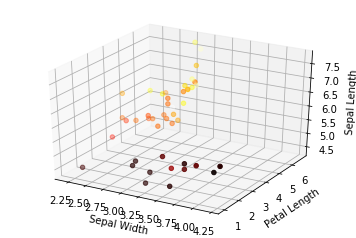

Coefficient(s):  [[ 0.67949071  0.76307605 -0.69193026]]
Residual sum of squares: 0.11
Variance score: 0.82


Pairwise Combination:  Sepal Length, Petal Length and Petal Width - Sepal Width


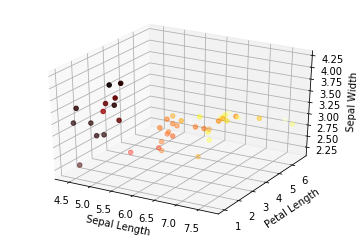

Coefficient(s):  [[ 0.62160719 -0.64193053  0.70215921]]
Residual sum of squares: 0.11
Variance score: 0.46


Pairwise Combination:  Sepal Length, Sepal Width and Petal Width - Petal Length


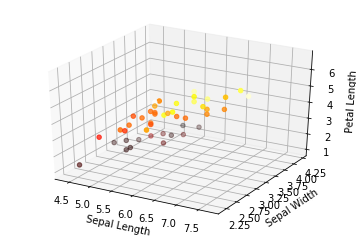

Coefficient(s):  [[ 0.72926916 -0.67061852  1.44741074]]
Residual sum of squares: 0.13
Variance score: 0.95


Pairwise Combination:  Sepal Length, Sepal Width and Petal Length - Petal Width


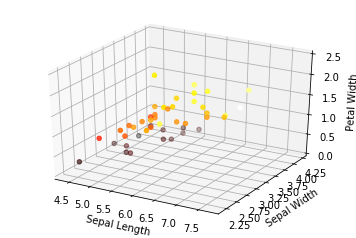

Coefficient(s):  [[-0.25330035  0.28098074  0.5544281 ]]
Residual sum of squares: 0.04
Variance score: 0.90




In [150]:
for a, b, c, d in combinations2:
    feature_X = features[[b, c, d]]
    feature_y = features[[a]]
    X_train, X_test, y_train, y_test = train_test_split(feature_X, feature_y, test_size=0.3, random_state=101)
    regr = LinearRegression()
    regr.fit(X_train, y_train)
    print("Pairwise Combination: ", b + ", " + c + " and " + d + " - " + a)
    plot3(regr, X_test, y_test, a, b, c, d)
    print_result(regr, X_test, y_test)

In [1]:
# Residual sum of squares(RSS) is a measure of the discrepancy between the data and an estimation model.
# R2 score is a common method of measuring the accuracy of regression models.
# R2 = 1 - RSS/TSS, where TSS measues the total variance in Y.

# In one to one relation, Petal Length to Petal Width is the most predictive pair for one another.
# In two to one relation, Sepal Length and Petal Width to Petal Length is the most predictive pair for one another.
# In three to one relation, Sepal Length, Sepal Width and Petal Width to Petal Length is the most predictive pair for one another.